In [ ]:
# Correction & comments updation is needed for the code. I will update the comments later when i get proper time and design something similar with 
# the help of AI random portfolio examples for indian market. 

In [ ]:
#SquareQuant is a comprehensive Python package for financial risk metrics and stock data analysis.

In [2]:
pip install squarequant

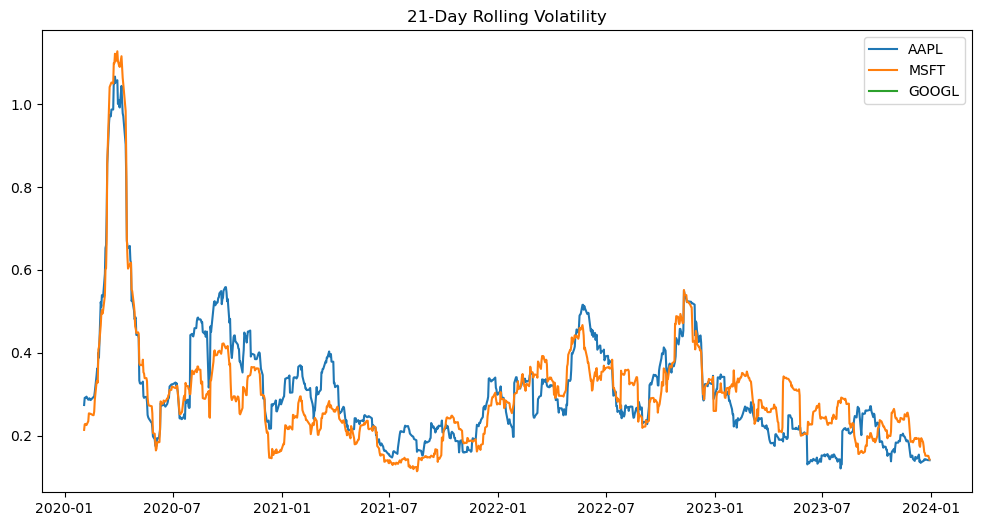

In [9]:
import squarequant as sq
import pandas as pd
import matplotlib.pyplot as plt

# Configure data download
config = sq.DownloadConfig(
    start_date="2020-01-01",
    end_date="2023-12-31",
    interval='1d',
    columns=['Close'],
    source="yfinance"  # Or "theta" for Theta Data
)

# Download data
data = sq.download_tickers(['AAPL', 'MSFT', 'GOOGL'], config)
data = pd.DataFrame({
    'AAPL': data['AAPL_Close'],
    'MSFT': data['MSFT_Close']
})

# Calculate volatility
vol = sq.vol(data=data, assets=['AAPL', 'MSFT', 'GOOGL'], use_returns=False, window=21)

# Calculate Sharpe ratio
sharpe = sq.sharpe(data=data, assets=['AAPL', 'MSFT', 'GOOGL'], use_returns=False, window=252)

# Visualize results (using matplotlib directly)
plt.figure(figsize=(12, 6))
plt.plot(vol)
plt.title('21-Day Rolling Volatility')
plt.legend(vol.columns)
plt.show()

In [ ]:
# Analyzing multiple risk metrics

In [21]:
import squarequant as sq
import matplotlib.pyplot as plt

# Download data
config = sq.DownloadConfig(
    start_date="2018-01-01",
    end_date="2023-12-31",
    interval='1d'
)
data = sq.download_tickers(['SPY', 'QQQ'], config)

# Calculate multiple risk metrics
vol = sq.vol(data=data, assets=['SPY', 'QQQ'], use_returns=False, window=21)
mad = sq.mad(data=data, assets=['SPY', 'QQQ'], use_returns=False, window=252)
mdd = sq.mdd(data=data, assets=['SPY', 'QQQ'], use_returns=False, window=252)
ulcer = sq.ulcer(data=data, assets=['SPY', 'QQQ'], use_returns=False, window=252)

# Visualize comparison (using matplotlib directly)
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(vol.['SPY_VOL'])
plt.title("SPY Volatility")

plt.subplot(3, 1, 2)
plt.plot(mdd)
plt.title("SPY Max Drawdown")

plt.subplot(3, 1, 3)
plt.plot(ulcer)
plt.title("SPY Ulcer Index")

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (1302196543.py, line 21)

In [ ]:
#Portfolio risk analysis

In [2]:
import squarequant as sq
import pandas as pd

# Example portfolio weights
weights = pd.Series({'AAPL': 0.3, 'MSFT': 0.3, 'AMZN': 0.2, 'GOOGL': 0.2})

# Download data
config = sq.DownloadConfig(start_date="2020-01-01", end_date="2023-12-31")
data = sq.download_tickers(weights.index.tolist(), config)

# Calculate portfolio risk measures
portfolio_var = sq.var(
    data=data,
    use_returns = False,
    assets=weights.index.tolist(),
    confidence=0.95,
    window=252,
    holding_period=10
)

# Print results
print(f"Latest Portfolio VaR (95%): {portfolio_var.iloc[-1].values[0]:.4f}")

Latest Portfolio VaR (95%): nan


In [ ]:
#Using Advanced Risk Measures

In [23]:
config = sq.DownloadConfig(
    start_date="2020-01-01",
    end_date="2023-12-31",
    source="yfinance"  # Default
)

In [24]:
config = sq.DownloadConfig(
    start_date="2020-01-01",
    end_date="2023-12-31",
    source="theta"
)

In [25]:
import squarequant as sq

# Download data
config = sq.DownloadConfig(start_date="2018-01-01", end_date="2023-12-31")
data = sq.download_tickers(['SPY'], config)

# Calculate Entropic Risk Measure with different risk aversion parameters
erm1 = sq.erm(data=data, use_returns=False, assets=['SPY'], z=0.5, confidence=0.95)
erm2 = sq.erm(data=data, use_returns=False, assets=['SPY'], z=1.0, confidence=0.95)
erm3 = sq.erm(data=data, use_returns=False, assets=['SPY'], z=2.0, confidence=0.95)

# Compare with traditional VaR and CVaR
var = sq.var(data=data, use_returns=False, assets=['SPY'], confidence=0.95)
cvar = sq.cvar(data=data, use_returns=False, assets=['SPY'], confidence=0.95)

print(f"Latest ERM (z=0.5): {erm1.iloc[-1, 0]:.4f}")
print(f"Latest ERM (z=1.0): {erm2.iloc[-1, 0]:.4f}")
print(f"Latest ERM (z=2.0): {erm3.iloc[-1, 0]:.4f}")
print(f"Latest VaR (95%): {var.iloc[-1, 0]:.4f}")
print(f"Latest CVaR (95%): {cvar.iloc[-1, 0]:.4f}")

ValueError: returns_type must be 'absolute', 'relative', or 'log'